<a href="https://colab.research.google.com/github/rithwik-tech/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# Reading the data
df = pd.read_csv("/content/spam.csv",encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<ipython-input-5-882e157bc440>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1', data=df, palette=['#ff9999','#66b3ff'])


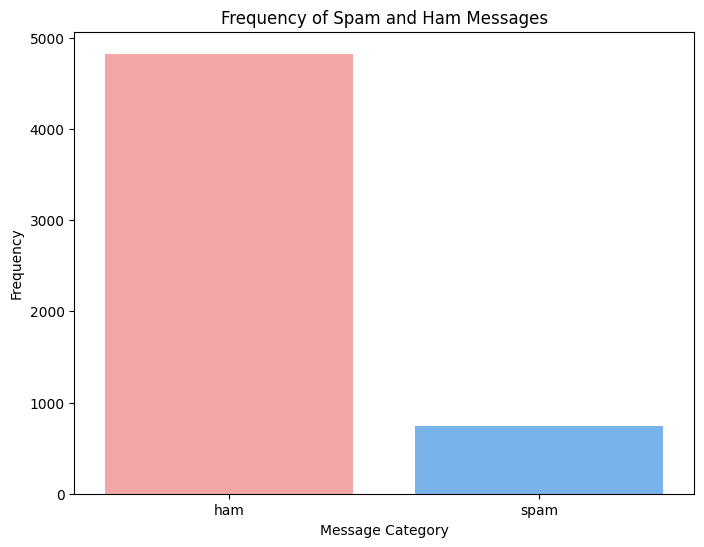

In [5]:
# @title Frequency of Spam and Ham Messages

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=df, palette=['#ff9999','#66b3ff'])
plt.title('Frequency of Spam and Ham Messages')
plt.xlabel('Message Category')
_ = plt.ylabel('Frequency')

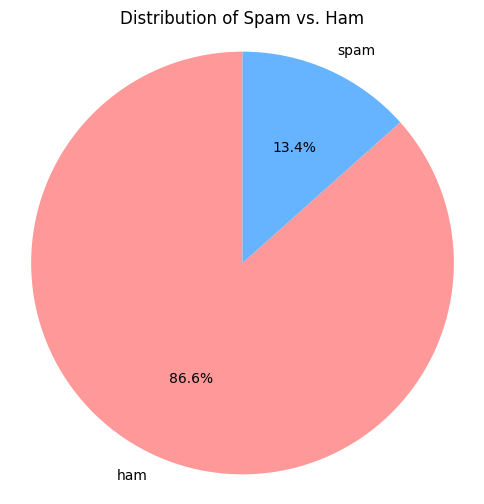

In [4]:
# @title Distribution of Spam vs. Ham

import matplotlib.pyplot as plt

# Count the occurrences of spam and ham
counts = df['v1'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Spam vs. Ham')
_ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

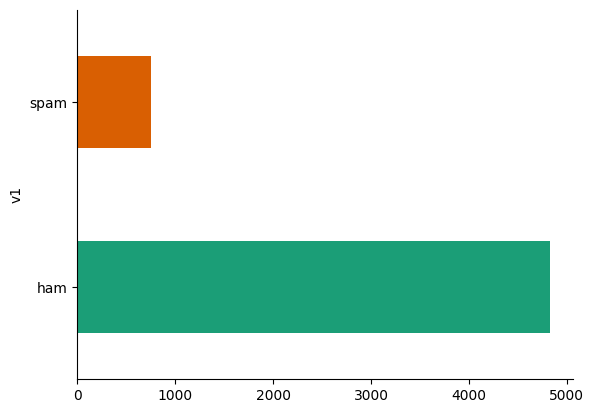

In [3]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()


,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


from matplotlib import pyplot as plt
_df_0['label_enc'].plot(kind='hist', bins=20, title='label_enc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['label_enc'].plot(kind='line', figsize=(8, 4), title='label_enc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Text'].value_counts()
    for x_label, grp in _df_4.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('Text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='label_enc', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='label_enc', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

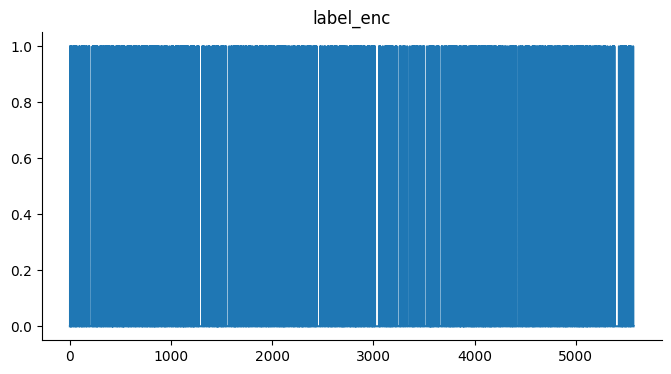

In [10]:
# @title label_enc

from matplotlib import pyplot as plt
df['label_enc'].plot(kind='line', figsize=(8, 4), title='label_enc')
plt.gca().spines[['top', 'right']].set_visible(False)

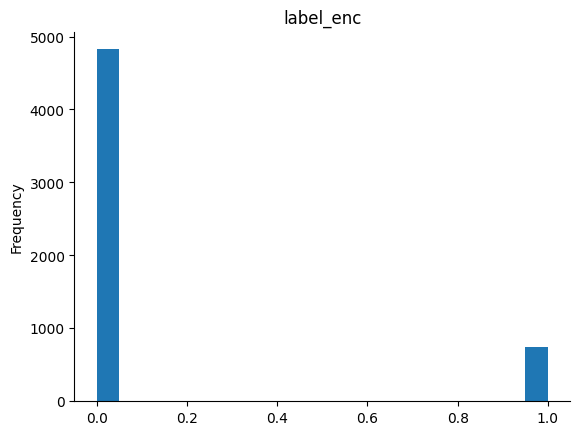

In [9]:
# @title label_enc

from matplotlib import pyplot as plt
df['label_enc'].plot(kind='hist', bins=20, title='label_enc')
plt.gca().spines[['top', 'right',]].set_visible(False)

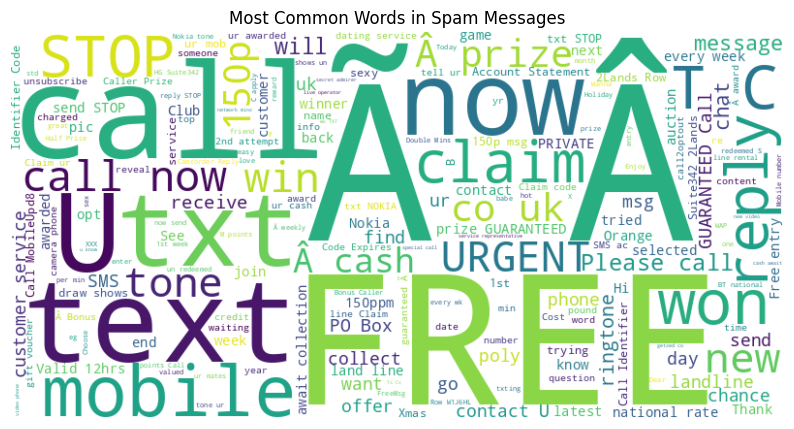

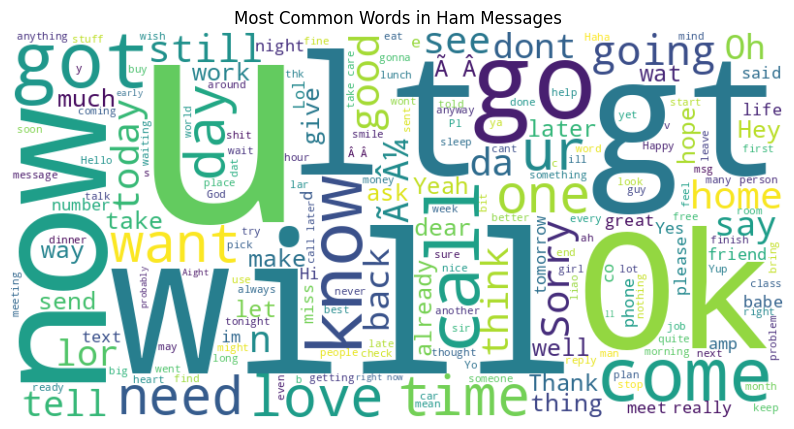

In [8]:
# @title Most Common Words in Spam and Ham Messages

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create separate dataframes for spam and ham messages
spam_df = df[df['label'] == 'spam']
ham_df = df[df['label'] == 'ham']

# Combine all spam messages into a single string
spam_text = ' '.join(spam_df['Text'].values)

# Combine all ham messages into a single string
ham_text = ' '.join(ham_df['Text'].values)

# Create and display the word cloud for spam messages
plt.figure(figsize=(10, 6))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(spam_text)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Most Common Words in Spam Messages')
plt.axis('off')

# Create and display the word cloud for ham messages
plt.figure(figsize=(10, 6))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(ham_text)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Most Common Words in Ham Messages')
_ = plt.axis('off')

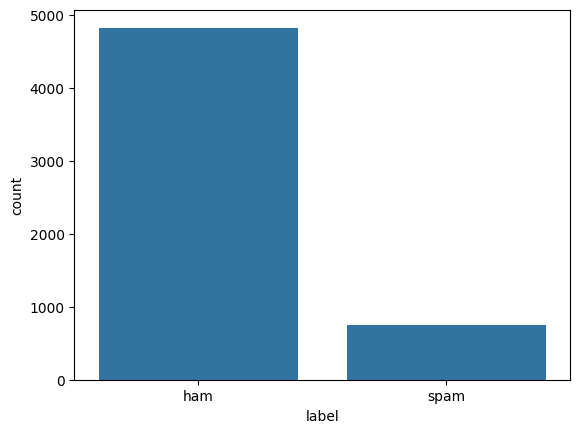

In [11]:
sns.countplot(x=df['label'])
plt.show()


In [12]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)


16


In [13]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)


15686


In [14]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)


MultinomialNB()

In [16]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)


In [17]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compile_model(model):
    '''
    simply compile the model with adam optimzer
    '''
    model.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy,
    precision, recall and f1-score
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)

    model_results_dict = {'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                        'f1-score': f1}

    return model_results_dict

def fit_model(model, epochs, X_train=X_train, y_train=y_train,
            X_test=X_test, y_test=y_test):
  '''
  fit the model with given epochs, train
  and test data
  '''
  # Check if validation data is provided
  if X_test is not None and y_test is not None:
      history = model.fit(X_train,
                      y_train,
                      epochs=epochs,
                      validation_data=(X_test, y_test)) #Removed validation steps argument
  else:
      # Handle case where validation data is not provided
      history = model.fit(X_train,
                      y_train,
                      epochs=epochs)
  return history

# This code is modified by Susobhan Akhuli


In [20]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(
    64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(.1)(flatten)
x = layers.Dense(32, activation='relu')(dropout)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)

compile_model(model_2) # compile the model
history_2 = fit_model(model_2, epochs=5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test) # fit the model

# This code is modified by Susobhan Akhuli


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.8895 - loss: 0.2844 - val_accuracy: 0.9776 - val_loss: 0.0817
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9916 - loss: 0.0374 - val_accuracy: 0.9785 - val_loss: 0.0782
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9973 - loss: 0.0146 - val_accuracy: 0.9812 - val_loss: 0.0840
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9776 - val_loss: 0.1032
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.9999 - loss: 8.0679e-04 - val_accuracy: 0.9821 - val_loss: 0.1077


In [21]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Disable XLA compilation
tf.config.optimizer.set_jit(False)

# model with functional api
input_layer = keras.Input(shape=[], dtype=tf.string)

# universal-sentence-encoder layer
# directly from tfhub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                        trainable=False,
                        input_shape=[],
                        dtype=tf.string,
                        name='USE')

# Create a Lambda layer to wrap the use_layer call
# Specify the output shape of the USE layer
x = layers.Lambda(lambda x: use_layer(x), output_shape=(512,))(input_layer)

x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation=keras.activations.relu)(x)
output_layer = layers.Dense(1, activation=keras.activations.sigmoid)(x)

model_3 = keras.Model(input_layer, output_layer)

compile_model(model_3)


history_3 = fit_model(model_3, epochs=5)

# This code is modified by Susobhan Akhuli


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8775 - loss: 0.4261 - val_accuracy: 0.9713 - val_loss: 0.1047
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9743 - loss: 0.0934 - val_accuracy: 0.9785 - val_loss: 0.0677
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9802 - loss: 0.0675 - val_accuracy: 0.9821 - val_loss: 0.0574
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9885 - loss: 0.0430 - val_accuracy: 0.9830 - val_loss: 0.0539
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9889 - loss: 0.0462 - val_accuracy: 0.9839 - val_loss: 0.0522


In [22]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
model_3_results = evaluate_model(model_3, X_test, y_test)

total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results,
                             'USE-Transfer learning Model':model_3_results}).transpose()

total_results


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.963229,1.000000,0.724832,0.840467
Custom-Vec-Embedding Model,0.173094,0.033776,0.187919,0.057260
Bidirectional-LSTM Model,0.982063,0.944828,0.919463,0.931973
USE-Transfer learning Model,0.983857,0.951724,0.926174,0.938776


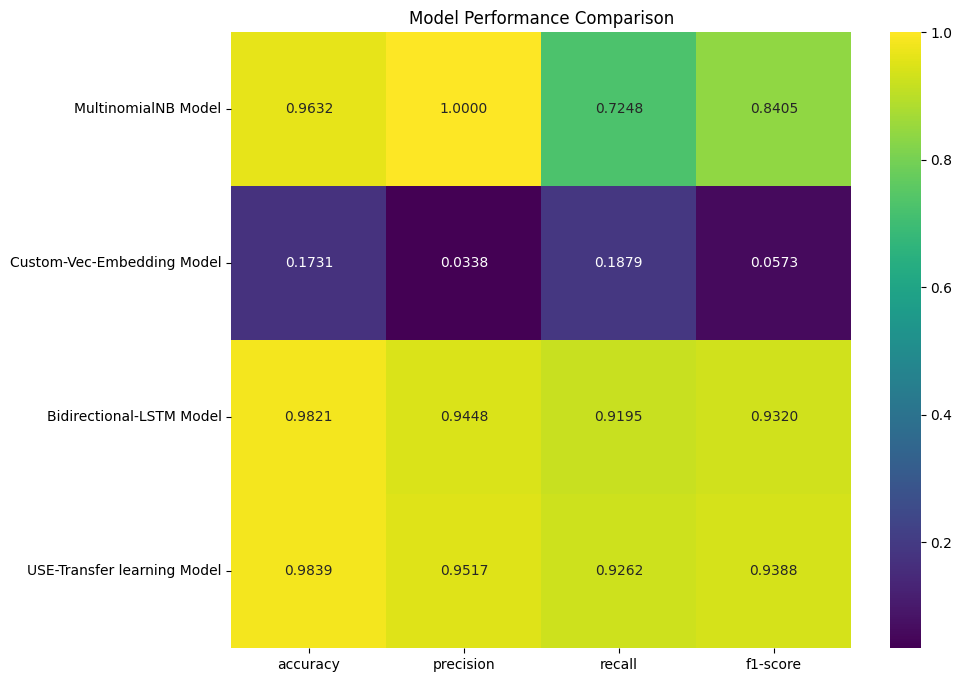

In [24]:
# prompt: give code for heat map

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(total_results, annot=True, cmap='viridis', fmt=".4f")
plt.title('Model Performance Comparison')
plt.show()